#  <font face="times"><font size="6pt"><p style = 'text-align: center;'> Installing bmplib and FFT Tutorial

<font face="times"><font size="3pt"><p style = 'text-align: center;'> In this tutorial, learn how to install a new python package into your python environment, in particular, bmplib (the BMPL python library). Then using the spectral functions in this module, you'll learn how to do a Fast Fourier Transform.

### Installing a Python module from Github

Open a python terminal. If you are using Anaconda, go to your environment in Anaconda Navigator and open an IPython terminal. We want to install the bmplib package which can be found here: https://github.com/dschaffner/bmplib

In your IPython terminal, input the following line:
```Python
pip install git+https://github.com/dschaffner/bmplib
```

This will install the bmplib module as a library in your environment. Once this is finished installing you can close the terminal as we'll continue the tutorial in this notebook.

You can now import bmplib:
```Python
import bmplib
```
Do this in the next cell. If it is not running properly, you may need to close the notebook and restart it.

In [1]:
import bmplib

### Using FFTs
We'll now use the function 
```Python 
spectrum_wwind()
```
to explore Fast Fourier Transforms. An FFT is a method for decomposing a discrete array of data (usually temporal or spatial data) into the sum of sinusodal functions. Start by importing numpy with the alias np, and matplotlib.pylab as plt in a cell below.

In [2]:
import numpy as np

In [3]:
import matplotlib.pylab as plt

Next, declare an array, x, with 10000 elements and scaled by a factor of 0.01:
```Python
x=np.arange(10000)*0.01
```

In [4]:
x=np.arange(10000)*0.01

Next, define some sine functions with a variety of angular frequencies, $\omega$. For example, define $y_{1}$ with $\omega = 1$ as:
```Python
y1=np.sin(1*x)
```
In the same cell, define similar functions $y_{2}$ (with $\omega = 2$), $y_3$, $y_{10}$, and $y_{20}$.

In [5]:
y1=np.sin(1*x)
y2=np.sin(2*x)
y3=np.sin(3*x)
y10=np.sin(10*x)
y20=np.sin(20*x)

Let's take a look at some of these functions. In the cell below, write out the following block of code:
```Python
plt.figure(1)
plt.plot(x,y1)
plt.plot(x,y3)
plt.plot(x,y10)
plt.xlim(0,15)
plt.ylim(-2,2)
```

(-2.0, 2.0)

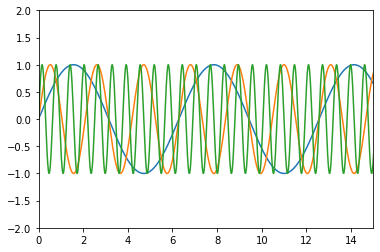

In [6]:
plt.figure(1)
plt.plot(x,y1)
plt.plot(x,y3)
plt.plot(x,y10)
plt.xlim(0,15)
plt.ylim(-2,2)

You should get a plot with multiple sine waves overlaid with three different frequencies clearly visible such as in the image below. 

<img src="FFT_tutorial_files/sine_wave_output.png" align="left" />

### Functions with multiple frequencies

Let's now see what happens if we combine sine wave functions into a single function. 

In a cell below, define a new function that combines the three sine waves above with different amounts, a, b, and c:
```Python
y_sum1=a*y1+b*y3+c*y10
```
Remember, though, you must define each variable a, b, and c first or the code will throw an error. Initially, set a=0.8, b=0.1, c=0.4

In [7]:
a=0.8
b=0.1
c=0.4
y_sum=a*y1+b*y3+c*y10

Now plot y_sum in the cell below. Use the same x and y limits as the plot above.

(-2.0, 2.0)

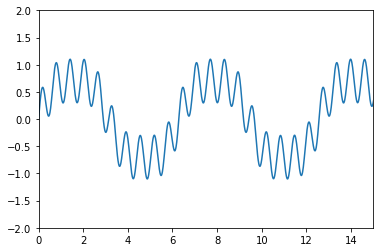

In [8]:
plt.plot(x,y_sum)
plt.xlim(0,15)
plt.ylim(-2,2)

You should see what looks like high frequency oscillation on top of a lower frequency oscillation.

Let's now look at an interactive widget. First we need to define a function that will take different values of the coefficients for each sine wave and construct a sum function.
```Python
def sum_sine(a=1.0,b=1.0,c=1.0):
    x=np.arange(10000)*0.01
    y1=np.sin(1*x)
    y3=np.sin(3*x)
    y10=np.sin(10*x)
    sum1=a*y1+b*y2+c*y3
    
    plt.plot(x,y_sum)
    plt.xlim(0,15)
    plt.ylim(-2,2)
```

In [9]:
from ipywidgets import interactive, fixed
def sum_sine(a=0.8,b=0.1,c=0.4):
    x=np.arange(10000)*0.01
    y1=np.sin(1*x)
    y3=np.sin(3*x)
    y10=np.sin(10*x)
    sum1=a*y1+b*y3+c*y10
    
    plt.plot(x,sum1)
    plt.xlim(0,15)
    plt.ylim(-2,2)

In [10]:
w=interactive(sum_sine,a=(0.0,1.0),b=(0.0,1.0),c=(0.0,1.0))
w

interactive(children=(FloatSlider(value=0.8, description='a', max=1.0), FloatSlider(value=0.1, description='b'…

Finally, let's get to using FFTs. From ``` bmplib``` we are going to use the function ```spectrum_wwind()```
To call the function we need to give in an number of storage arrays. We'll use the first sine wave function, ```y1``` defined above.
```Python
freq, freq2, comp, pwr10, mag, phase2, cos_phase, dt = bmplib.spectral.spectrum_wwind(y1,x)
```

In [11]:
import bmplib.spectral as bmp

In [12]:
freq, freq2, comp, pwr10, mag, phase2, cos_phase, dt = bmp.spectral_functions.spectrum_wwind(y1,x)

AttributeError: module 'bmplib.spectral' has no attribute 'spectral_functions'